<a href="https://colab.research.google.com/github/SandrinoMoh/Final_Sandra/blob/main/Pycaret_test_Sandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

references: [Classification Module and Setting Up Environment, Stats Wire](https://www.youtube.com/watch?v=d9ligHUbQZI)
[Getting Dataset in PyCaret, Stats Wire](https://www.youtube.com/watch?v=CaVynleG-ZQ)
[Pycaret Linear Regression, Stats Wire](https://www.youtube.com/watch?v=E3Gj9GcTOxQ)
[Guide for automating ML workflows using pycaret, bootcamp](https://www.datacamp.com/tutorial/guide-for-automating-ml-workflows-using-pycaret )
[Pycaret gitbook](https://pycaret.gitbook.io/docs/get-started/quickstart#regression)
[Pycaret tutorials](https://www.pycaret.org/tutorials/html/REG101.html)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data
insurance = get_data('insurance')



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#split data for testing and training (70%-30%)
data_train= insurance.sample(frac=0.7, random_state= 786)

In [ ]:
data_train.shape # 937 columns is the 70% for training

(937, 7)

In [ ]:
data_train.head()

,age,sex,bmi,children,smoker,region,charges
685,53,male,26.41,2,no,northeast,11244.3769
1171,43,female,26.70,2,yes,southwest,22478.6000
779,53,male,28.88,0,no,northwest,9869.8102
1046,43,female,25.08,0,no,northeast,7325.0482
53,36,male,34.43,0,yes,southeast,37742.5757


In [ ]:
# drop the data split for training i.e. the 70% of the dataset
data_test= insurance.drop(data_train.index)

In [ ]:
data_test.shape

(401, 7)

In [ ]:
data_test.head()

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
5,31,female,25.740,0,no,southeast,3756.62160
7,37,female,27.740,3,no,northwest,7281.50560
11,62,female,26.290,0,yes,southeast,27808.72510


In [ ]:
# to reset the index (1st column) for the training data
data_train.reset_index(drop= True, inplace= True)

In [ ]:
data_train.head()

,age,sex,bmi,children,smoker,region,charges
0,53,male,26.41,2,no,northeast,11244.3769
1,43,female,26.70,2,yes,southwest,22478.6000
2,53,male,28.88,0,no,northwest,9869.8102
3,43,female,25.08,0,no,northeast,7325.0482
4,36,male,34.43,0,yes,southeast,37742.5757


In [ ]:
# to reset the testing data index
data_test.reset_index(drop= True, inplace= True)
data_test

,age,sex,bmi,children,smoker,region,charges
0,28,male,33.000,3,no,southeast,4449.46200
1,33,male,22.705,0,no,northwest,21984.47061
2,31,female,25.740,0,no,southeast,3756.62160
3,37,female,27.740,3,no,northwest,7281.50560
4,62,female,26.290,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
396,42,female,40.370,2,yes,southeast,43896.37630
397,42,female,32.870,0,no,northeast,7050.02130
398,52,male,38.600,2,no,southwest,10325.20600
399,52,female,44.700,3,no,southwest,11411.68500


In [ ]:
#import module
from pycaret.regression import *

In [ ]:
#environment setup
reg = setup(data= data_train, target= 'charges', session_id= 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(937, 7)"
4,Transformed data shape,"(937, 10)"
5,Transformed train set shape,"(655, 10)"
6,Transformed test set shape,"(282, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
# I didn't find a polynomial regression estimator in pycaret- Chat gpt gave me the following code which didn't work
poly_reg_model = create_model('polynomial')

ValueError: Estimator polynomial not available. Please see docstring for list of available estimators.

In [ ]:
# to identify the best model
#Reminder: MAE= mean absolute error; MSE= mean square error; RMSE= root mean square error; R2, RMSLE= Root Mean Squared Logarithmic Error
# MAPE= mean absolute percentage error
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2656.3950,21975385.7714,4656.4164,0.8445,0.4606,0.3404,0.1670
rf,Random Forest Regressor,2687.2408,22840656.5341,4740.1854,0.8379,0.4592,0.3264,0.3330
lightgbm,Light Gradient Boosting Machine,2909.0282,23735955.2368,4840.9657,0.8336,0.5380,0.3765,0.5020
ada,AdaBoost Regressor,3856.4231,25058493.0640,4979.7132,0.8242,0.6023,0.6683,0.1130
et,Extra Trees Regressor,2774.0864,25811835.9474,5044.6272,0.8153,0.4703,0.3222,0.4040
xgboost,Extreme Gradient Boosting,3057.6385,27563860.2000,5212.2814,0.8092,0.5089,0.3898,0.1530
ridge,Ridge Regression,4187.2410,36289291.4968,5962.5190,0.7465,0.5740,0.4279,0.0930
br,Bayesian Ridge,4176.9842,36292371.1282,5961.9935,0.7463,0.6134,0.4261,0.0950
lar,Least Angle Regression,4165.7975,36288807.3459,5960.8735,0.7462,0.5943,0.4242,0.0930
llar,Lasso Least Angle Regression,4166.1719,36286945.5380,5960.7488,0.7462,0.5933,0.4244,0.1310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# create a model manually
lr= create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5182.7185,52611925.7313,7253.4079,0.6760,0.9178,0.4121
1,4606.1526,43309007.4385,6580.9579,0.7960,0.5040,0.4152
2,3166.0923,18729598.7780,4327.7706,0.8717,0.7711,0.4285
3,3876.2137,34301811.1418,5856.7748,0.7489,0.6043,0.4478
4,4598.4214,40181642.9517,6338.8992,0.7791,0.4187,0.3490
5,3384.8619,25462329.6808,5046.0212,0.7987,0.5021,0.4322
6,3498.1531,24027228.8966,4901.7577,0.8102,0.5007,0.4529
7,4652.0676,43986779.3722,6632.2530,0.5578,0.5260,0.4251
8,4080.9647,40538466.6842,6366.9825,0.6679,0.6573,0.4304


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# fine tuning the model
tuned_lr= tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5182.7185,52611925.7313,7253.4079,0.6760,0.9178,0.4121
1,4606.1526,43309007.4385,6580.9579,0.7960,0.5040,0.4152
2,3166.0923,18729598.7780,4327.7706,0.8717,0.7711,0.4285
3,3876.2137,34301811.1418,5856.7748,0.7489,0.6043,0.4478
4,4598.4214,40181642.9517,6338.8992,0.7791,0.4187,0.3490
5,3384.8619,25462329.6808,5046.0212,0.7987,0.5021,0.4322
6,3498.1531,24027228.8966,4901.7577,0.8102,0.5007,0.4529
7,4652.0676,43986779.3722,6632.2530,0.5578,0.5260,0.4251
8,4080.9647,40538466.6842,6366.9825,0.6679,0.6573,0.4304


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


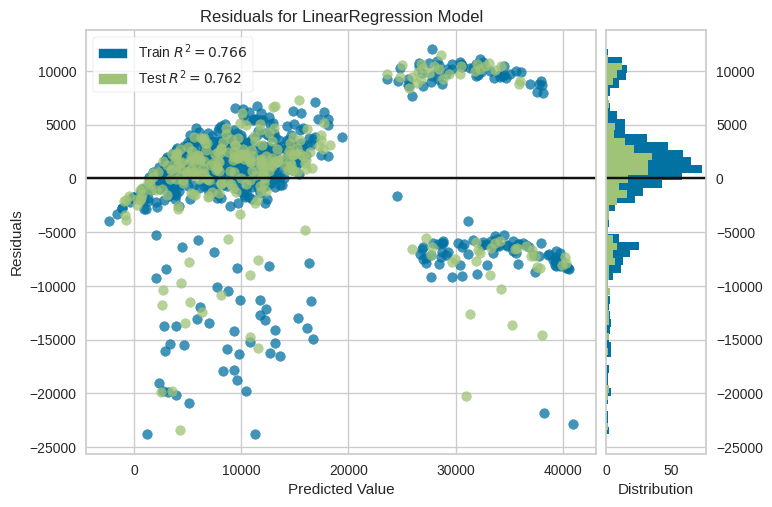

In [ ]:
plot_model(lr)

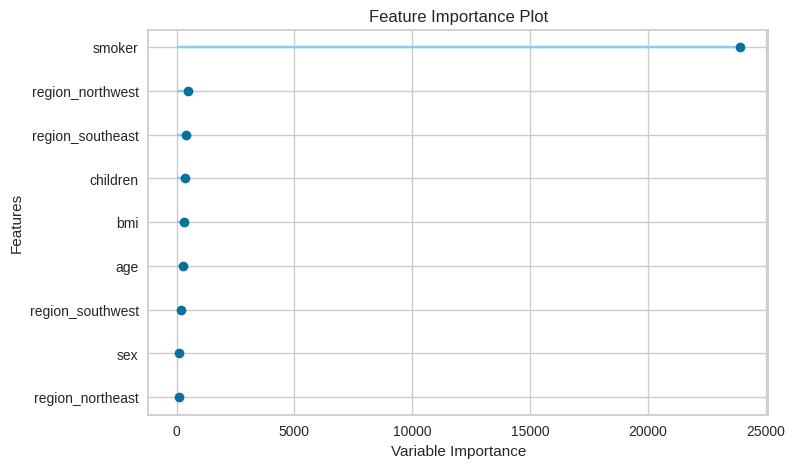

In [ ]:
# Plot by importance of the feature
plot_model(lr, plot="feature")

In [ ]:
#This function analyzes the performance of a trained model on the test set.
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#saving the model
save_model(lr, "Regression Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                mapping=[{'col': 'sex',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
     

In [ ]:
saved_final_model= load_model("Regression Model")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction= predict_model(saved_final_model, data= data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4455.5301,41762196.2634,6462.3677,0.7141,0.5925,0.4238


In [ ]:
new_prediction.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
0,28,male,33.000000,3,no,southeast,4449.461914,6422.976863
1,33,male,22.705000,0,no,northwest,21984.470703,4319.690298
2,31,female,25.740000,0,no,southeast,3756.621582,3937.360876
3,37,female,27.740000,3,no,northwest,7281.505371,8189.969858
4,62,female,26.290001,0,yes,southeast,27808.724609,36378.856612
